# Assignment 1

# Rajesh Raskoti (THA079MSISE10)

## Definition of Machine Learning

Machine learning is sub-field of artifical intelligence (AI) that deals with development of computer systems that are able to learn by using mathematical and statistical models to analyse and draw insights from data without being explicitly programmed.Machine learning represents a specialized domain within the broader field of artificial intelligence (AI), focused on the creation of computer systems capable of acquiring knowledge and improving performance through the utilization of mathematical and statistical models. These models enable machines to scrutinize data, extracting valuable insights and patterns, all without the need for explicit programming. In essence, machine learning empowers systems to autonomously learn and adapt, enhancing their functionality in response to data-driven experiences. Machine learning are of three types namely supervise, unsupervised and reinforcement learning. The differences between supervised and unsupervised machine learning are as follows:-

| Topics | Supervised Learning | Unsupervised Learning |
| --- | --- | --- |
| Definition | A type of machine learning where the model is trained on a labeled dataset, meaning the input data is paired with corresponding output labels. | Involves training a model on an unlabeled dataset, allowing it to find patterns and relationships within the data without predefined output labels. |
| --- | --- | --- |
| Training Data | Requires labeled training data consisting of input-output pairs.| Utilizes unlabeled training data, relying on the algorithm to discern patterns independently. |
| --- | --- | --- |
| Objective |To predict or classify new, unseen data based on the patterns learned from the labeled training data.|To discover inherent structures, patterns, or relationships within the data without specific predefined goals.|
| --- | --- | --- |
| Example Algorithms | Linear Regression, Decision Trees, Support Vector Machines (SVM). | K-Means Clustering, Principal Component Analysis (PCA), Hierarchical Clustering. |
| --- | --- | --- |
| Example |  Predicting house prices based on features such as square footage, number of bedrooms, and location. | Clustering news articles into topics without prior information on the content.|


## Definition of feature, label, training data, testing data, model evaluation metrics

<b>Feature</b> - Features are the measureable piece of data that can be used for analysis. For example - location of house, square foot of total land can be important features of estimation of house price.

<b>Label</b> - Label or target is the output that machine learning model try to predict. For example - House price, Breast cancer prediction, loan prediction etc.

<b>Training data</b> - Training data is a extremely large dataset from which machine learning model learns patterns. Training data contains both features and target variables.

<b>Testing data</b> - Testing data is a comparatively small data that is use for testing the machine learning model.

<b>Model evaluation metrics</b> - Model evaluation metrics are the tools that are used for measuring the performance of models i.e how  well they are making prediction. The choice of performance metrics depends on type of problem one is solving. The performance metrics that are used for classification task are-
1. <b>Accuracy</b> : It is the ratio of total correctly classified instances to the total instances. <b>Accuracy : (True positive + True negative) / (True positive + True negative + False positive + False negative)</b>

2. <b>Precision</b> : Ratio of true positive predictions to the all positive predictions made by the model. <b>Precision : True positive / (True positive + False positive)</b>

3. <b>Recall</b> : Ratio of actual positive instances to all the actual positive samples in the dataset. <b>Recall : True Positives / (True Positives + False Negatives)</b>

4. <b>F1 score</b> : The harmonic mean of precision and recall. <b>F1 score : 2 * (Precision * Recall) / (Precision + Recall)</b>

5. <b>Area Under the Receiver Operating Characteristics (ROC AUC)</b>: Area under the ROC curve, which plots the true positive rate against the false positive rate at various thresholds. 

The performance metrics that are used for regression task are-

1. <b>Mean absolute error (MAE)</b>: Average absolute differences between predicted and actual values. <b>MAE : (1/N) Σ |actual - predicted|</b>

2. <b>Mean Squared Error (MSE)</b>: Average of the squared differences between predicted and actual values. <b>MSE : (1/N) Σ (actual - predicted)^2</b>

3. <b>Root Mean Squared Error (RMSE)</b>: Square root of the MSE, providing error in the same units as the target variable. <b>RMSE: {(1/N) Σ (actual - predicted)^2}^0.5</b>

# Dataset Explanation

The dataset is loan prediction dataset. This dataset contains 13 columns and 614 records. 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' and 'Property_Area' are features and 'Loan_Status' is the target variable. 

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
## read csv file as dataframe using read_csv function of pandas
df = pd.read_csv("train.csv")

# Understanding datasets

In [3]:
## show first five rows of dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
## see the shape of your dataset
df.shape

(614, 13)

In [5]:
## statistical overview of your dataset that contains numerical values
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here, we can see mean, standard deviation, minimum value, maximum value, 25th percentile, 50th percentile and 75th percentile of corresponding data. Looking at count and shape of dataframe we can tell that there are missing values in certain features or not. Here, LoanAmount, Loan_Amount_Term and Credit_History have missing data in them.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here, we can see the datatypes (categorical, int, float) for each columns in the dataset. We also can ger insights whether there are any missing values in the certain features of dataset or not.

In [7]:
## number of missing values in each of the features in dataset.
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The number of missing values in all the features are calculated here. We can see that Gender has 13 missing values in it and feature Married has 3 missing values and so on. 

# Filling categorical null values 

In [8]:
## fill categorical null values using mode
def fill_categorical_null_values(df, variable):
    df[variable] = df[variable].fillna(df[variable].mode()[0])
    return df[variable]

In [9]:
df["Gender"] = fill_categorical_null_values(df, "Gender")
df["Married"] = fill_categorical_null_values(df, "Married")
df["Dependents"] = fill_categorical_null_values(df, "Dependents")
df["Self_Employed"] = fill_categorical_null_values(df, "Self_Employed")

# Filling Numerical null values

In [10]:
## fill numerical null values using median
def fill_numerical_null_values(df, variable):
    df[variable] = df[variable].fillna(df[variable].median())
    return df[variable]

In [11]:
df["LoanAmount"] = fill_numerical_null_values(df, "LoanAmount")
df["Loan_Amount_Term"] = fill_numerical_null_values(df, "Loan_Amount_Term")
df["Credit_History"] = fill_numerical_null_values(df, "Credit_History")

# Datasets visualization

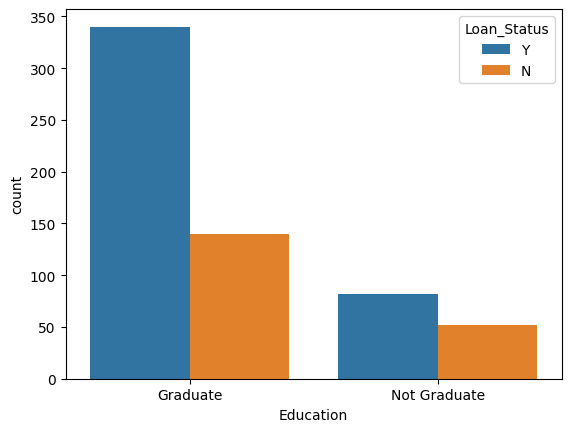

In [12]:
sns.countplot(x = "Education", hue = "Loan_Status", data = df)
plt.show()

This graph shows countplot between Education feature and Loan status. People who have graduation degree gets loan approval than the who are not graduated.

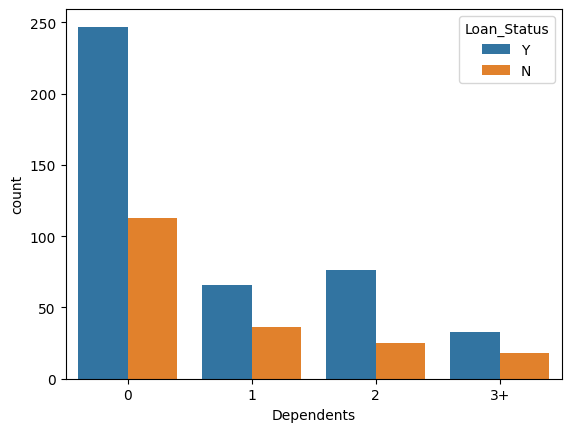

In [13]:
sns.countplot(x = "Dependents", hue = "Loan_Status", data = df)
plt.show()

This graph shows that peple with less number of dependent peoples have higher probability of getting loan. Here we can see that people with zero dependents have higher chance of getting loan than people with higher number of dependent people. People with more than three dependent people have least probability of getting loan.

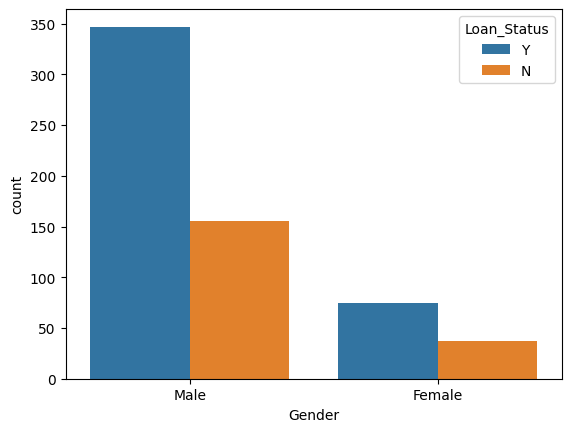

In [14]:
sns.countplot(x = "Gender", hue = "Loan_Status", data = df)
plt.show()

This graph shows that Males have greater loan approval rate than Females.

<Axes: xlabel='Property_Area', ylabel='count'>

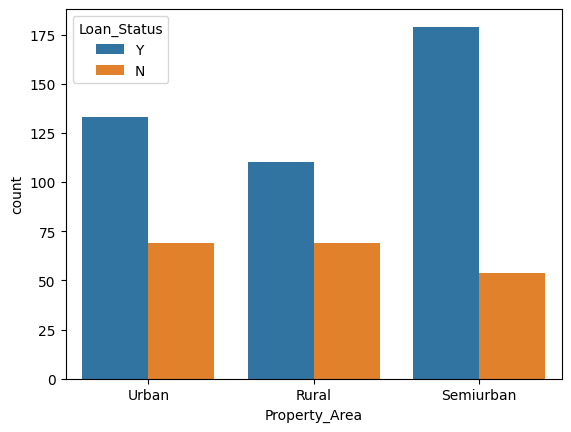

In [15]:
sns.countplot(x="Property_Area", hue = "Loan_Status", data = df)

People from semiurban areas have greatest successful loan approval rate. People from rural areas have lower successful loan approval rate in comparison to the people from urban and semiurban areas.

<Axes: xlabel='Married', ylabel='count'>

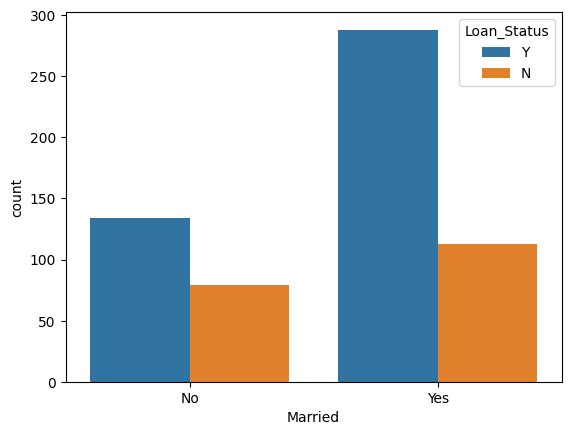

In [16]:
sns.countplot(x="Married", hue = "Loan_Status", data = df)

Married people have higher successful loan approval rate than that of unmarried ones.

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

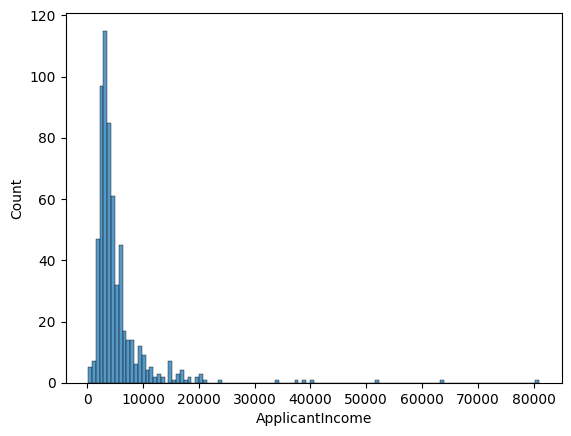

In [17]:
sns.histplot(x="ApplicantIncome", data=df)

This histogram shows that maximum of the applicant earns between 0 - 10000

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

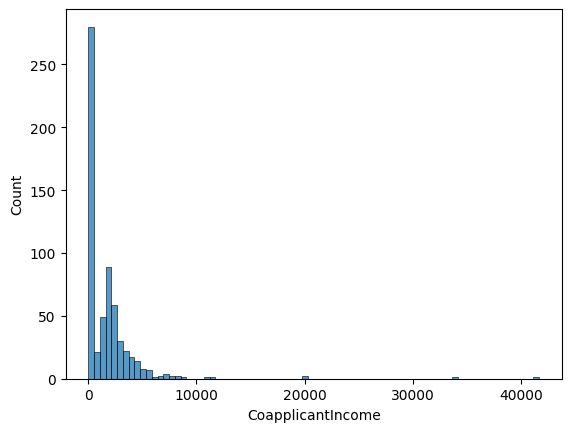

In [18]:
sns.histplot(x="CoapplicantIncome", data=df)

Maximum of the coapplicant doesn't earn. Maximum of the coapplicant that earns, they earns somewhere around 4000-5000. And there are some coapplicant that earns above 40000.

<Axes: xlabel='LoanAmount', ylabel='Count'>

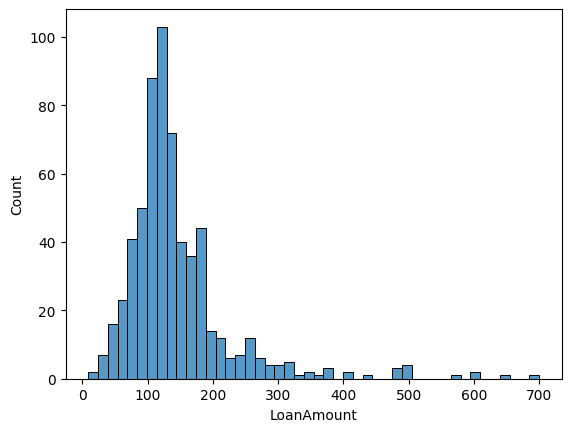

In [19]:
sns.histplot(x="LoanAmount", data=df)

There are very small number of people that gets loan amount of 400-700(k). Most of the applicant are provided with loan amount of somewhere between 0-400(k).

<Axes: >

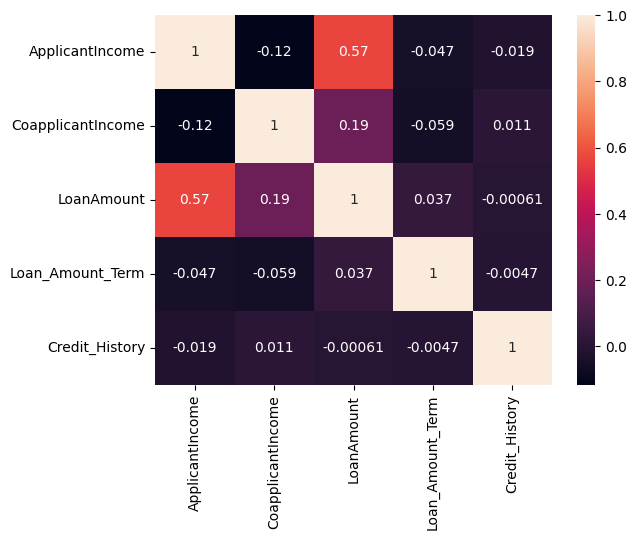

In [20]:
sns.heatmap(df.corr(), annot = True)

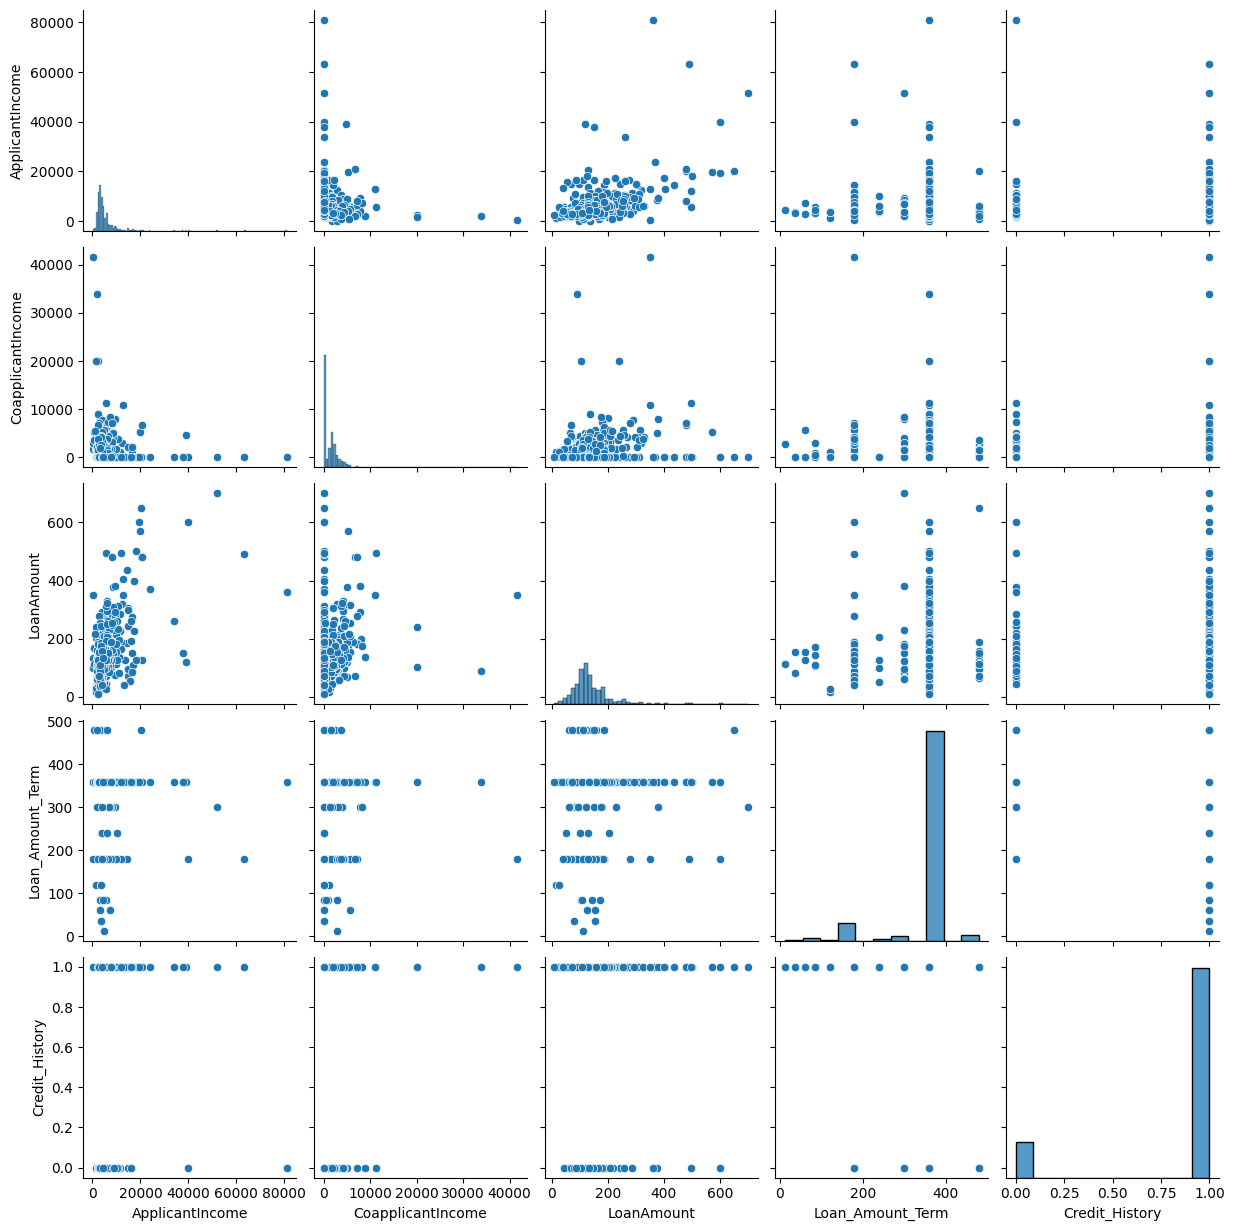

In [21]:
sns.pairplot(data = df)

In [22]:
## Drop Loan_ID feature as it doesnot have any impact on decision of loan approval.
new_df = df.copy()
df.drop(columns = ["Loan_ID", "Loan_Status"], inplace = True)

# Converting Categorical variable to numerical

In [23]:
df = pd.get_dummies(df, drop_first = True)

In [24]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1


In [25]:
## Add applicant income and coapplicant income and make new feature called income
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

# Standardization & Datasets splitting to train and test

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X = df
y = new_df['Loan_Status']

In [28]:
## individual values of features have different range and units.
scaler = StandardScaler()

In [29]:
scaler.fit(X)

StandardScaler()

In [30]:
X = scaler.transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# DecisionTree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier()

In [34]:
model = dt.fit(X_train, y_train)

In [35]:
prediction = model.predict(X_test)
print(prediction)

['Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y']


# Performance Evaluation of Decision Tree Classifier

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
print("Accuracy of DecisionTree Classifier is: ",accuracy_score(y_test, prediction)*100, "%")

Accuracy of DecisionTree Classifier is:  68.29268292682927 %


In [38]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           N       0.55      0.53      0.54        43
           Y       0.75      0.76      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.68      0.68      0.68       123



In [39]:
print(confusion_matrix(y_test, prediction))

[[23 20]
 [19 61]]


This models correctly predicts the 84 target variables while make wrong prediction on 39 data.

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
LR = LogisticRegression()

In [42]:
model = LR.fit(X_train, y_train)

In [43]:
prediction = model.predict(X_test)

In [44]:
prediction

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N'], dtype=object)

In [45]:
print("Accuracy of Logistic Regression is: ",accuracy_score(y_test, prediction)*100, "%")

Accuracy of Logistic Regression is:  78.04878048780488 %


In [46]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [47]:
print(confusion_matrix(y_test, prediction))

[[18 25]
 [ 2 78]]


This models correctly predicts the 96 target variables while make wrong prediction on 27 data.

# Potential Improving areas

The dataset contains outliers in features like LoanAmount and Total Income, which can be addressed using statistical tools such as percentiles and interquartile range. Additionally, missing values have been replaced with mode and median values, but an alternative approach involves replacing them with expert-provided values for a more informed imputation strategy.

# Reflection on working experience

The dataset exhibits missing values, replaced by mode for categorical and median for numerical features, raising uncertainty about the appropriateness of this imputation strategy. Ambiguity surrounds the treatment of outliers, with their potential usefulness or vulnerability unclear, making the decision to include or remove them challenging. The process of selecting a machine learning model for the dataset appears arbitrary at present. Furthermore, there is confusion about the optimal visualization approach, leaving the extent of necessary data visualization unclear. In summary, concerns linger regarding imputation, outlier handling, machine learning model selection, and data visualization strategies in this dataset.